In [1]:
import pandas as pd
from pandas import DataFrame,Series 
%matplotlib inline
import math


In [2]:
dataset = pd.read_csv("UW Data.csv")

In [3]:
import sqlite3
data = dataset.rename(columns = {'Account Type':'Account_Type', 'Character Code': 'Character_Code'})
conn = sqlite3.connect('city.db')
data.to_sql('city_table', conn, if_exists = 'replace', index = False)
revenue = pd.read_sql('select * from city_table where "Account_Type" == "Revenue"',conn)
expense = pd.read_sql('select * from city_table where "Account_Type" == "Expense"',conn)

In [4]:
#code to extract just the police data from the total table
police = []
for index in range(len(revenue)):
    if revenue['Agency'].loc[index][0:2] == '31':
        police.append(revenue.loc[index])
policerev = DataFrame(police)
p = []
for index in range(len(expense)):
    if expense['Agency'].loc[index][0:2] == '31':
        p.append(expense.loc[index])
policeex = DataFrame(p)

In [5]:
net2015 = sum(policerev['year2015']) - sum(policeex['year2015'])
net2016 = sum(policerev['year2016']) - sum(policeex['year2016'])
net2017 = sum(policerev['year2017']) - sum(policeex['year2017'])
net2018 = sum(policerev['year2018']) - sum(policeex['year2018'])
data = {'year':['2015','2016','2017','2018'], 'Net Income':[net2015,net2016,net2017,net2018]}
x = DataFrame(data)

Text(0.5,1,'Madison Police Net Profit (Past Four Years)')

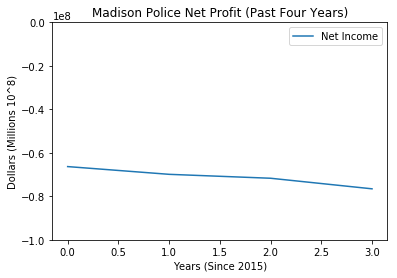

In [6]:
policeexrev = x.plot.line()
policeexrev.set_ylim(-100000000,0)
policeexrev.set_ylabel('Dollars (Millions 10^8)')
policeexrev.set_xlabel('Years (Since 2015)')
policeexrev.set_title('Madison Police Net Profit (Past Four Years)')

Text(0.5,1,'Madison Police Net Profit (Past Four Years) Local')

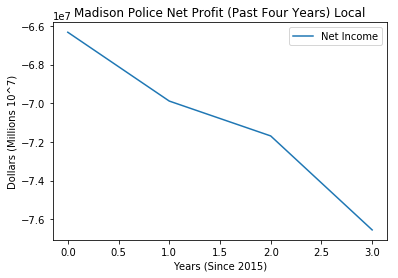

In [7]:
policeexrevlocal = x.plot.line()
policeexrevlocal.set_ylabel('Dollars (Millions 10^7)')
policeexrevlocal.set_xlabel('Years (Since 2015)')
policeexrevlocal.set_title('Madison Police Net Profit (Past Four Years) Local')

In [8]:
#code to extract just the engineering data
engineering = []
for index in range(len(revenue)):
    if revenue['Agency'].loc[index][0:2] == '40':
        engineering.append(revenue.loc[index])
engrev = DataFrame(engineering)
engine = []
for index in range(len(expense)):
    if expense['Agency'].loc[index][0:2] == '40':
        engine.append(expense.loc[index])
engex = DataFrame(engine)

In [9]:
ne2015 = sum(engrev['year2015']) - sum(engex['year2015'])
ne2016 = sum(engrev['year2016']) - sum(engex['year2016'])
ne2017 = sum(engrev['year2017']) - sum(engex['year2017'])
ne2018 = sum(engrev['year2018']) - sum(engex['year2018'])
daa = {'year':['2015','2016','2017','2018'], 'Net Income':[ne2015,ne2016,ne2017,ne2018]}
xe = DataFrame(daa)

Text(0.5,1,'Madison Engineering Net Profit (Past Four Years)')

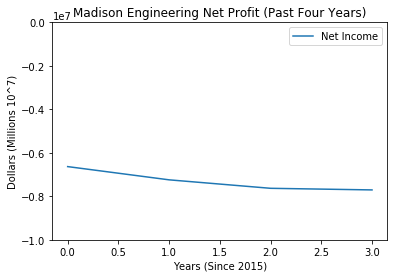

In [10]:
engrevex = xe.plot.line()
engrevex.set_ylim(-10000000,0)
engrevex.set_ylabel('Dollars (Millions 10^7)')
engrevex.set_xlabel('Years (Since 2015)')
engrevex.set_title('Madison Engineering Net Profit (Past Four Years)')

Text(0.5,1,'Madison Engineering Net Profit (Past Four Years) Local')

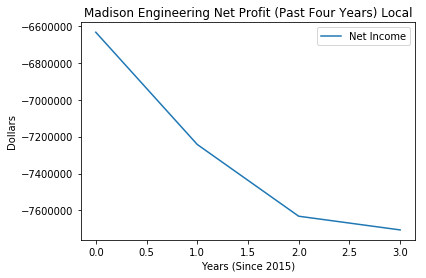

In [11]:
engrevexlocal = xe.plot.line()
engrevexlocal.set_ylabel('Dollars')
engrevexlocal.set_xlabel('Years (Since 2015)')
engrevexlocal.set_title('Madison Engineering Net Profit (Past Four Years) Local')

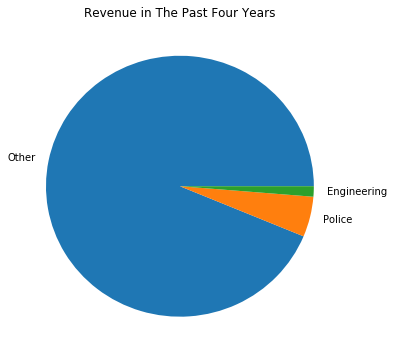

In [12]:
totalrev = sum(revenue['year2015']) + sum(revenue['year2016']) + sum(revenue['year2017']) + sum(revenue['year2018'])
totalreveng = sum(engrev['year2015']) + sum(engrev['year2016']) + sum(engrev['year2017']) + sum(engrev['year2018'])
totalrevpol = sum(policerev['year2015']) + sum(policerev['year2016']) + sum(policerev['year2017']) + sum(policerev['year2018'])
Rev = Series([totalrev - totalreveng - totalrevpol,totalrevpol,totalreveng], index = ['Other','Police','Engineering'])
Rev.plot.pie(figsize=(6,6), title = 'Revenue in The Past Four Years',label = '')

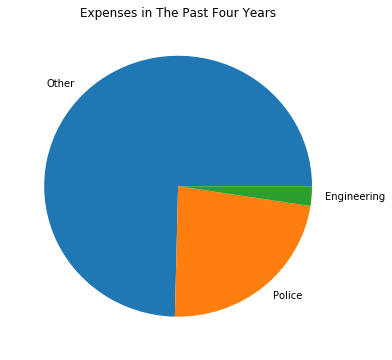

In [13]:
totalex = sum(expense['year2015']) + sum(expense['year2016']) + sum(expense['year2017']) + sum(expense['year2018'])
totalexeng = sum(engex['year2015']) + sum(engex['year2016']) + sum(engex['year2017']) + sum(engex['year2018'])
totalexpol = sum(policeex['year2015']) + sum(policeex['year2016']) + sum(policeex['year2017']) + sum(policeex['year2018'])
Rev = Series([totalex - totalexeng - totalexpol,totalexpol,totalexeng], index = ['Other','Police','Engineering'])
Rev.plot.pie(figsize=(6,6), title = 'Expenses in The Past Four Years',label = '')

In [14]:
engin = []
for index in range(len(expense)):
    if expense['Organization'].loc[index][0:5] == '31130':
        engin.append(expense.loc[index])
poponorth = DataFrame(engin)

In [15]:
engi = []
for index in range(len(expense)):
    if expense['Organization'].loc[index][0:5] == '31140':
        engi.append(expense.loc[index])
popowest = DataFrame(engi)


In [16]:
pl = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%SALARIES"',conn)
policesalaries = pl['year2015'].sum() + pl['year2016'].sum() + pl['year2017'].sum() + pl['year2018'].sum()

In [17]:
Xl = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn)
policebenefits = Xl['year2015'].sum() + Xl['year2016'].sum() + Xl['year2017'].sum() + Xl['year2018'].sum()

In [18]:
#DATASET.groupby(['character code"'])[2018].sum()
#salaries,benefits,supplies, purchased services, interdepartcharges, transfer out
#where Ageny like "" and (Character_Code LIKE "%salaries" or Character_Code LIKE %benefits)

In [19]:
Xs = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%SUPPLIES"',conn)
policesupplies = Xs['year2015'].sum() + Xs['year2016'].sum() + Xs['year2017'].sum() + Xs['year2018'].sum()

In [20]:
Xt = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%PURCHASED SERVICES"',conn)
policeservices = Xt['year2015'].sum() + Xt['year2016'].sum() + Xt['year2017'].sum() + Xt['year2018'].sum()

In [21]:
Xz = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%INTER DEPART CHARGES"',conn)
policedepartcharges = Xz['year2015'].sum() + Xz['year2016'].sum() + Xz['year2017'].sum() + Xz['year2018'].sum()

In [22]:
Xh = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%TRANSFER OUT"',conn)
policetransfer = Xh['year2015'].sum() + Xh['year2016'].sum() + Xh['year2017'].sum() + Xh['year2018'].sum()

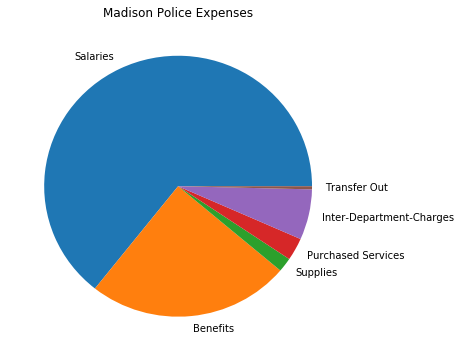

In [23]:
policetotalexpenses = Series([policesalaries/4,(policebenefits)/4,(policesupplies)/4,(policeservices)/4,(policedepartcharges)/4,(policetransfer)/4], index = ['Salaries','Benefits','Supplies',"Purchased Services","Inter-Department-Charges","Transfer Out"])
policetotalexpenses.plot.pie(figsize = (6,6), title = "Madison Police Expenses", label = '')

In [24]:
salaries = pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES"',conn)


In [25]:
firesal = pd.read_sql('select year2015 from city_table where Account_Type == "Expense" and Agency LIKE "%FIRE" and Character_Code LIKE "%SALARIES"',conn).sum()[0] + pd.read_sql('select year2016 from city_table where Account_Type == "Expense" and Agency LIKE "%FIRE" and Character_Code LIKE "%SALARIES"',conn).sum()[0]+ pd.read_sql('select year2017 from city_table where Account_Type == "Expense" and Agency LIKE "%FIRE" and Character_Code LIKE "%SALARIES"',conn).sum()[0] + pd.read_sql('select year2018 from city_table where Account_Type == "Expense" and Agency LIKE "%FIRE" and Character_Code LIKE "%SALARIES"',conn).sum()[0]

In [26]:
totalsalaries = salaries['year2015'].sum() + salaries['year2016'].sum() + salaries['year2017'].sum() + salaries['year2018'].sum()

In [27]:
x = pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%Engineering"',conn)
engineeringsalaries = x['year2015'].sum() + x['year2016'].sum() + x['year2017'].sum() + x['year2018'].sum()

In [28]:
y = pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%library"',conn)
librarysalaries = y['year2015'].sum() + y['year2016'].sum() + y['year2017'].sum() + y['year2018'].sum()

In [29]:
k= pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%Parks"',conn)
parksal = k['year2015'].sum() + k['year2016'].sum() + k['year2017'].sum() + k['year2018'].sum()

In [30]:
z= pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%INFORMATION TECHNOLOGY"',conn)
infosal = z['year2015'].sum() + z['year2016'].sum() + z['year2017'].sum() + z['year2018'].sum()

In [31]:
O= pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%STREETS"',conn)
streetsal = O['year2015'].sum() + O['year2016'].sum() + O['year2017'].sum() + O['year2018'].sum()

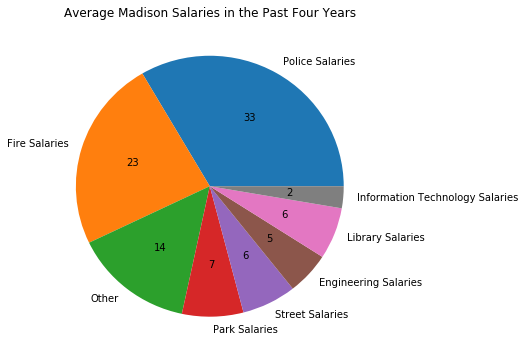

In [58]:
Series([policesalaries,firesal,totalsalaries - streetsal - parksal - policesalaries - infosal - firesal - engineeringsalaries - librarysalaries,parksal,streetsal,engineeringsalaries,librarysalaries,infosal], index = ['Police Salaries',"Fire Salaries",'Other',"Park Salaries","Street Salaries",'Engineering Salaries',"Library Salaries","Information Technology Salaries"],).plot.pie(figsize=(6,6), autopct = "%d",title = 'Average Madison Salaries in the Past Four Years',label = '')

In [33]:
#goes with chart above
DataFrame(Series([policesalaries,firesal,totalsalaries - streetsal - parksal - policesalaries - infosal - firesal - engineeringsalaries - librarysalaries,parksal,streetsal,engineeringsalaries,librarysalaries,infosal], index = ['Police Salaries',"Fire Salaries",'Other',"Park Salaries","Street Salaries",'Engineering Salaries',"Library Salaries","Information Technology Salaries"])).sort_values(0,ascending = False)

,0
Police Salaries,1.869293e+08
Fire Salaries,1.327874e+08
Other,8.130851e+07
Park Salaries,4.138685e+07
Street Salaries,3.687362e+07
Library Salaries,3.579799e+07
Engineering Salaries,2.938811e+07
Information Technology Salaries,1.518194e+07


In [34]:
policebenefits = pd.read_sql('select year2015 from city_table where Account_Type == "Expense" and Agency LIKE "%POLICE" and Character_Code LIKE "%BENEFITS"',conn).sum()[0] + pd.read_sql('select year2016 from city_table where Account_Type == "Expense" and Agency LIKE "%POLICE" and Character_Code LIKE "%BENEFITS"',conn).sum()[0]+ pd.read_sql('select year2017 from city_table where Account_Type == "Expense" and Agency LIKE "%POLICE" and Character_Code LIKE "%BENEFITS"',conn).sum()[0] + pd.read_sql('select year2018 from city_table where Account_Type == "Expense" and Agency LIKE "%POLICE" and Character_Code LIKE "%BENEFITS"',conn).sum()[0]

In [35]:
totalbenefits = pd.read_sql('select year2015 from city_table where Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn).sum()[0] + pd.read_sql('select year2016 from city_table where Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn).sum()[0]+ pd.read_sql('select year2017 from city_table where Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn).sum()[0] + pd.read_sql('select year2018 from city_table where Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn).sum()[0]

In [36]:
benefits = Series([policebenefits,totalbenefits - policebenefits],index = ['Police Benefits', 'Other Benefits'])

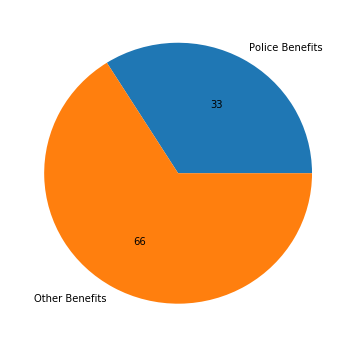

In [37]:
benefits.plot.pie(figsize = (6,6), label = '',autopct = "%d")

In [38]:
x= pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%SALARIES" and Agency LIKE "%STREETS"',conn)
x['year2015'].sum() + x['year2016'].sum() + x['year2017'].sum() + x['year2018'].sum()

36873618.2

In [39]:
salaries.sort_values('year2016',ascending = False)

,Agency,Organization,Account_Type,Character_Code,Object,2015,2016,2017,2018,year2015,year2016,year2017,year2018
1232,31 - POLICE,31100 - POLICE FIELD,Expense,51 - SALARIES,51110 - PERMANENT WAGES,1683135.91,35579570.28,35523116.02,36606647.32,1683135.91,35579570.28,35523116.02,36606647.32
1242,30 - FIRE,30110 - FIRE GEN FIELD OP,Expense,51 - SALARIES,51110 - PERMANENT WAGES,26347926.99,26125756.30,26810625.07,27757237.00,26347926.99,26125756.30,26810625.07,27757237.00
1093,31 - POLICE,31200 - POLICE SUPPORT,Expense,51 - SALARIES,51110 - PERMANENT WAGES,135084.46,4090900.74,4134753.02,4489756.37,135084.46,4090900.74,4134753.02,4489756.37
1119,31 - POLICE,31100 - POLICE FIELD,Expense,51 - SALARIES,51310 - OVERTIME WAGES PERMANENT,184727.96,2727946.76,2945417.48,3109602.47,184727.96,2727946.76,2945417.48,3109602.47
1236,50 - LIBRARY,50100751 - LIB PUBLIC SERVICE CENTRAL,Expense,51 - SALARIES,51110 - PERMANENT WAGES,2421770.43,2649604.97,2992622.51,3195891.91,2421770.43,2649604.97,2992622.51,3195891.91
1234,17 - INFORMATION TECHNOLOGY,17200 - IT TECHNICAL SERVICES,Expense,51 - SALARIES,51110 - PERMANENT WAGES,1756764.41,1920089.12,1955117.76,1905395.05,1756764.41,1920089.12,1955117.76,1905395.05
1231,17 - INFORMATION TECHNOLOGY,17100 - IT APPLICATION DEVELOP SUPPORT,Expense,51 - SALARIES,51110 - PERMANENT WAGES,1614250.83,1664210.87,1829531.18,1911554.69,1614250.83,1664210.87,1829531.18,1911554.69
1128,31 - POLICE,31100 - POLICE FIELD,Expense,51 - SALARIES,51140 - COMPENSATED ABSENCE,234421.69,1638890.64,1613645.42,1714569.58,234421.69,1638890.64,1613645.42,1714569.58
1233,51 - PARKS,51220 - PARK MTC FORESTRY GENERAL,Expense,51 - SALARIES,51110 - PERMANENT WAGES,1694443.33,1590062.04,1636473.07,1808415.42,1694443.33,1590062.04,1636473.07,1808415.42
1229,60 - BUILDING INSPECTION,60100 - BI INSPECTION,Expense,51 - SALARIES,51110 - PERMANENT WAGES,1328219.94,1425519.12,1421307.34,1441511.74,1328219.94,1425519.12,1421307.34,1441511.74


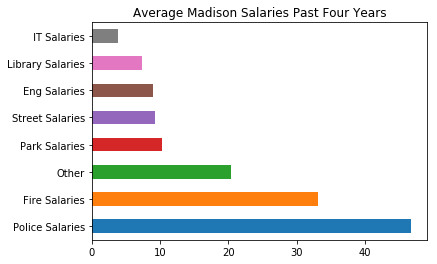

In [57]:
plot = Series([46.73,33.196,20.327,10.24,9.218,8.95,7.347,3.794], index = ['Police Salaries',"Fire Salaries",'Other',"Park Salaries","Street Salaries",'Eng Salaries',"Library Salaries"," IT Salaries"])
plot.plot.barh(x = "Dollars in Millions",title = "Average Madison Salaries Past Four Years")


In [71]:
Xl = pd.read_sql('select * from city_table where Agency LIKE "%police" and Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn)
police = Xl['year2015'].sum() + Xl['year2016'].sum() + Xl['year2017'].sum() + Xl['year2018'].sum()
police/4

17781628.265

In [72]:
Xl = pd.read_sql('select * from city_table where Account_Type == "Expense" and Character_Code LIKE "%BENEFITS"',conn)
total = Xl['year2015'].sum() + Xl['year2016'].sum() + Xl['year2017'].sum() + Xl['year2018'].sum()
total/4

52411767.30500001

In [73]:
police/total * 100

33.92678625302463